# EXAMEN 1 MOD2 REGRESIÓN LINEAL

## Importar

In [1]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [2]:
## Conocer encoding de csv
liga = '/home/ef/Documents/Diplomado/EXAMEN02/'
import chardet
with open(liga + 'train_PAY_AMT2.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
df = pd.read_csv(liga + 'train_PAY_AMT2.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
df.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1470,6743,300000.0,2,1,2,38,2,0,0,-1,9692.0,3772.0,1919.0,316.0,2360.0,3.0,0.0,0.0,2360.0,0.0
2118,7726,190000.0,2,1,1,30,-1,-1,-1,-1,500.0,0.0,19000.0,19000.0,19000.0,0.0,19000.0,19000.0,19000.0,19000.0
3535,3550,150000.0,1,1,2,35,0,0,0,0,147471.0,151713.0,130107.0,78623.0,79743.0,20000.0,5000.0,2000.0,7000.0,15000.0
539,20073,50000.0,1,2,2,29,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0.0,0.0


In [4]:
dim_antes = len(df)
df = df.iloc[:,1:].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   SEX        5625 non-null   int64  
 2   EDUCATION  5625 non-null   int64  
 3   MARRIAGE   5625 non-null   int64  
 4   AGE        5625 non-null   int64  
 5   PAY_3      5625 non-null   int64  
 6   PAY_4      5625 non-null   int64  
 7   PAY_5      5625 non-null   int64  
 8   PAY_6      5625 non-null   int64  
 9   BILL_AMT2  5625 non-null   float64
 10  BILL_AMT3  5625 non-null   float64
 11  BILL_AMT4  5625 non-null   float64
 12  BILL_AMT5  5625 non-null   float64
 13  BILL_AMT6  5625 non-null   float64
 14  PAY_AMT2   5625 non-null   float64
 15  PAY_AMT3   5625 non-null   float64
 16  PAY_AMT4   5625 non-null   float64
 17  PAY_AMT5   5625 non-null   float64
 18  PAY_AMT6   5625 non-null   float64
dtypes: float64(11), int64(8)
memory usage: 835.1 KB


In [5]:
cat = list(df.columns[1:9])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5625 non-null   object
 1   EDUCATION  5625 non-null   object
 2   MARRIAGE   5625 non-null   object
 3   PAY_3      5625 non-null   object
 4   PAY_4      5625 non-null   object
 5   PAY_5      5625 non-null   object
 6   PAY_6      5625 non-null   object
dtypes: object(7)
memory usage: 307.7+ KB


In [6]:
num = [col for col in df.columns if col not in cat]
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  5625 non-null   float64
 1   AGE        5625 non-null   int64  
 2   BILL_AMT2  5625 non-null   float64
 3   BILL_AMT3  5625 non-null   float64
 4   BILL_AMT4  5625 non-null   float64
 5   BILL_AMT5  5625 non-null   float64
 6   BILL_AMT6  5625 non-null   float64
 7   PAY_AMT2   5625 non-null   float64
 8   PAY_AMT3   5625 non-null   float64
 9   PAY_AMT4   5625 non-null   float64
 10  PAY_AMT5   5625 non-null   float64
 11  PAY_AMT6   5625 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 527.5 KB


In [7]:
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

## Análisis exploratorio

### Categóricas

In [8]:
## Reemplazar por NaN
dict_replace = {'0':np.nan,
                '5':np.nan,
                '6':np.nan}
df['EDUCATION'] = df['EDUCATION'].replace(dict_replace).copy()

df['MARRIAGE'] = df['MARRIAGE'].replace(dict_replace).copy()

df[cat].isnull().sum() / len(df)

SEX          0.000000
EDUCATION    0.011378
MARRIAGE     0.002311
PAY_3        0.000000
PAY_4        0.000000
PAY_5        0.000000
PAY_6        0.000000
dtype: float64

In [9]:
## Se omiten ausentes
df.dropna(inplace = True)
len(df) / dim_antes

0.9863111111111111

### Numéricas

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>],
       [<AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

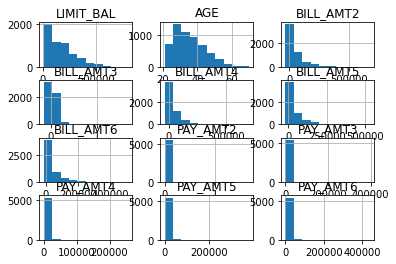

In [10]:
df[num].hist()

In [11]:
len(df) / dim_antes

0.9863111111111111

## Ingeniería de variables

### Numéricas

In [12]:
## Promedio de todos los montos de pago
df['Prom_monto'] = df[monto].mean(axis = 1)
num += ['Prom_monto']
df['Prom_monto'].describe()

count      5548.000000
mean      42943.969683
std       61971.960571
min       -6062.800000
25%        3950.950000
50%       19244.000000
75%       53883.400000
max      549171.000000
Name: Prom_monto, dtype: float64

In [13]:
## Dimensión hasta ahora
df.shape

(5548, 20)

In [14]:
df.reset_index(drop = True, inplace = True)

### Categóricas

In [15]:
for col in estatus:
    aux = []
    for i in range(len(df)):
        if int(df[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(df[col][i])
    df[col] = aux

for col in estatus:
    display(df[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_3
1,-1,0.204218
3,-2,0.136806
0,0,0.521810
2,>=1,0.137167


,index,PAY_4
1,-1,0.193403
2,-2,0.145097
0,0,0.548666
3,>=1,0.112833


,index,PAY_5
1,-1,0.185833
2,-2,0.151406
0,0,0.570476
3,>=1,0.092286


,index,PAY_6
1,-1,0.193583
2,-2,0.165285
0,0,0.535508
3,>=1,0.105624


In [16]:
[x for x in df.columns if x not in cat + num]

[]

In [17]:
## Se define la variable objetivo
tgt = ['PAY_AMT2']
num = [x for x in num if x not in tgt]
[x for x in df.columns if x not in cat + num]

['PAY_AMT2']

In [18]:
for col in cat[:3]:
    df[col] = df[col].astype(int)
    df[col] = df[col].astype(str)
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        5548 non-null   object
 1   EDUCATION  5548 non-null   object
 2   MARRIAGE   5548 non-null   object
 3   PAY_3      5548 non-null   object
 4   PAY_4      5548 non-null   object
 5   PAY_5      5548 non-null   object
 6   PAY_6      5548 non-null   object
dtypes: object(7)
memory usage: 303.5+ KB


## Modelaje

In [19]:
X = pd.get_dummies(df[cat]).join(df[num])
y = df[tgt]
y.describe()

,PAY_AMT2
count,5.548000e+03
mean,6.037457e+03
std,2.883987e+04
min,0.000000e+00
25%,8.382500e+02
50%,2.000000e+03
75%,5.000000e+03
max,1.684259e+06


In [20]:
X.shape

(5548, 37)

### Reducción de dimensiones

In [21]:
# Se eligirán las mejores variables
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(k = 17, score_func = f_regression)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
X[ls_best].describe()

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5.548000e+03,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000
mean,0.204218,0.136806,0.137167,0.145097,0.193583,0.165285,167375.212689,47918.177902,4.615743e+04,42665.237203,39790.690699,38188.312004,5353.723864,4681.533706,4470.328947,5137.254867,42943.969683
std,0.403165,0.343673,0.344054,0.352231,0.395142,0.371471,128407.926685,70712.961009,7.172108e+04,64015.210194,60452.296073,58355.392517,16583.627506,13709.514886,14013.198579,18100.822002,61971.960571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,-30000.000000,-1.572640e+05,-34503.000000,-19205.000000,-14433.000000,0.000000,0.000000,0.000000,0.000000,-6062.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,2667.750000,2.500000e+03,2243.000000,1700.000000,1159.000000,390.000000,300.000000,159.250000,117.750000,3950.950000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,20054.500000,1.928750e+04,18615.000000,17134.500000,15881.000000,1776.500000,1500.000000,1500.000000,1500.000000,19244.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240000.000000,61351.750000,5.830075e+04,53072.250000,50009.500000,48743.000000,4688.500000,4000.000000,4000.000000,4000.000000,53883.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,800000.000000,671563.000000,1.664089e+06,706864.000000,530672.000000,511905.000000,397092.000000,256662.000000,379267.000000,443001.000000,549171.000000


<AxesSubplot:>

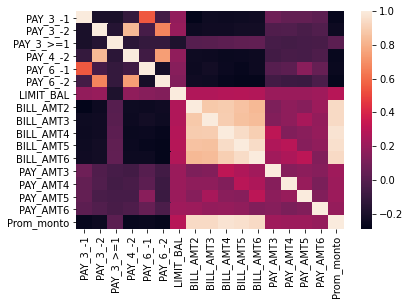

In [22]:
import seaborn as sns
sns.heatmap(X[ls_best].corr())

In [23]:
## Y modificamos la matriz X con las mejores variables
X = X[ls_best].copy()

### Escalamiento

In [24]:
## Se separan los conjuntos de entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 22)
len(y_test) / len(y_train)

0.11115561786501102

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()

## En train se ajusta y transforma
X = pd.DataFrame(mm_x.fit_transform(X_train),
                 columns = X.columns)
y = mm_y.fit_transform(y_train)

## Y en test sólo se transforma
X_test_mm = pd.DataFrame(mm_x.transform(X_test),
                         columns = X.columns)
y_test_mm = mm_y.transform(y_test)

X.describe()

,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.202884,0.136792,0.137593,0.145604,0.192069,0.165432,0.214755,0.111202,0.110807,0.104334,0.107369,0.095088,0.013351,0.017919,0.013955,0.011473,0.088369
std,0.402187,0.343662,0.344506,0.352744,0.393966,0.371607,0.175529,0.100957,0.095099,0.086905,0.110468,0.111350,0.040556,0.053244,0.042467,0.041415,0.111830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054795,0.046633,0.050494,0.049615,0.037992,0.024412,0.001002,0.001181,0.000473,0.000226,0.018059
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178082,0.071475,0.073742,0.071718,0.065938,0.052507,0.004533,0.005844,0.004731,0.003386,0.045685
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315068,0.130104,0.127444,0.118209,0.125855,0.115414,0.011647,0.015585,0.012615,0.009029,0.107480
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Entrenamiento

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X, y)
ridge_res = cross_val_score(estimator = ridge,
                         X = X,
                         y = y,
                         cv = 3,
                         n_jobs = -1,
                         scoring = "r2")

np.mean(ridge_res), np.std(ridge_res)

(0.42812996721575586, 0.027723800597609947)

### Hiper-parametrización

In [27]:
from sklearn.linear_model import ElasticNet

## Se crea un DF para almacenar scores con diferentes parámetros
df_res = pd.DataFrame(columns=["alpha", "l1_ratio", "score", "std"])
contador = 0
for i in range(0, 10, 1):
    for j in range(10):
        elasnet_h = ElasticNet(alpha=i, l1_ratio=j/10)
        elasnet_h.fit(X, y)
        ls_res = cross_val_score(estimator = elasnet_h, 
                                 X = X, 
                                 y = y, 
                                 cv = 3, 
                                 n_jobs = -1,
                                 scoring = "r2")
        df_res.loc[contador, "alpha"] = i
        df_res.loc[contador, "l1_ratio"] = j
        df_res.loc[contador, "score"] = np.mean(ls_res)
        df_res.loc[contador, "std"] = np.std(ls_res)
        contador += 1

## Se ordena dicho DF
df_res = df_res.sort_values(by = 'score',
                            ascending = False).copy().head(5)

## Se guardan los parámetros del mejor score
alphas = df_res.iloc[0,0]
l1_ratios = df_res.iloc[0,1]

<ipython-input-27-31d3d65f391b>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.831298897196262, tolerance: 0.001168615231204699
  model = cd_fast.enet_coordinate_descent(
<ipython-input-27-31d3d65f391b>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site

/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.823814296015677, tolerance: 0.001168615231204699
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.828451822628032, tolerance: 0.001168615231204699
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.831288644584614, tolerance: 0.001168615231204699
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/

In [28]:
## Y se ejecuta
elasnet_h = ElasticNet(alpha = alphas,
                     l1_ratio = l1_ratios)
elasnet_h.fit(X, y)
el_h_res = cross_val_score(estimator = elasnet_h,
                           X = X,
                           y = y,
                           cv = 3,
                           n_jobs = -1,
                           scoring = "r2")

np.mean(el_h_res), np.std(el_h_res)

<ipython-input-28-7404d29844e2>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasnet_h.fit(X, y)
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ef/Desktop/diplomadus/diplomadus/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.831298897196262, tolerance: 0.001168615231204699
  model = cd_fast.enet_coordinate_descent(


(0.46348719914493525, 0.1114500867823709)

### Prueba

In [29]:
pd.DataFrame(X).sample()

,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
2865,0.0,0.0,1.0,0.0,1.0,0.0,0.328767,0.04339,0.047151,0.048617,0.040542,0.033027,0.012592,0.012031,0.009461,0.0,0.01482


In [30]:
## Y se corre para el conjunto de prueba
from sklearn.metrics import r2_score
'{:,.2%}'.format(r2_score(y_pred = elasnet_h.predict(X_test_mm),
                          y_true = y_test_mm))

'79.74%'

In [31]:
import pickle

## Guardar modelo
with open('PAY_2.pkl', 'wb') as file:
    pickle.dump(elasnet_h, file)

## Abrir un modelo
with open('PAY_2.pkl', 'rb') as file:
    pay_2 = pickle.load(file)

## Listo para usarse
pay_2

ElasticNet(alpha=0, l1_ratio=0)

In [32]:
'{:,.2%}'.format(r2_score(y_pred = pay_2.predict(X_test_mm),
                          y_true = y_test_mm))

'79.74%'

## Validación

In [31]:
val = pd.read_csv(liga + 'val_PAY_AMT2.csv',
                 encoding = 'ascii',
                 sep = '|',
                 low_memory = False)
val.sample(4)

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1280,17739,20000.0,2,1,2,22,0,0,0,0,18786.0,16249.0,16478.0,10735.0,3274.0,1000.0,215.0,65.0,0.0
855,8498,360000.0,1,1,2,34,0,0,0,0,359050.0,366591.0,331833.0,288709.0,290583.0,13801.0,9852.0,10224.0,10010.0
237,3977,90000.0,2,3,2,24,-1,-1,-1,-2,207.0,18189.0,557.0,0.0,0.0,557.0,0.0,0.0,0.0
390,19008,210000.0,2,3,2,36,0,0,0,0,203447.0,206683.0,99411.0,63322.0,73433.0,4500.0,2407.0,12700.0,3200.0


In [32]:
cat = list(val.columns[2:10])
cat = [x for x in cat if x not in ['AGE']]
for col in cat:
    val[col] = val[col].astype(str)
val[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEX        1875 non-null   object
 1   EDUCATION  1875 non-null   object
 2   MARRIAGE   1875 non-null   object
 3   PAY_3      1875 non-null   object
 4   PAY_4      1875 non-null   object
 5   PAY_5      1875 non-null   object
 6   PAY_6      1875 non-null   object
dtypes: object(7)
memory usage: 102.7+ KB


In [33]:
## Ya no existe PAY_AMT1 ni 2 
num = [col for col in val.columns if col not in cat + ['CUSTOMER_ID']]
val[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  1875 non-null   float64
 1   AGE        1875 non-null   int64  
 2   BILL_AMT2  1875 non-null   float64
 3   BILL_AMT3  1875 non-null   float64
 4   BILL_AMT4  1875 non-null   float64
 5   BILL_AMT5  1875 non-null   float64
 6   BILL_AMT6  1875 non-null   float64
 7   PAY_AMT3   1875 non-null   float64
 8   PAY_AMT4   1875 non-null   float64
 9   PAY_AMT5   1875 non-null   float64
 10  PAY_AMT6   1875 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 161.3 KB


In [34]:
## Ya existen los conjuntos, pero no está de más redefinirlos
pay = [col for col in df.columns if col.startswith('PAY')]
pago = [x for x in pay if x.startswith('PAY_AMT')]
estatus = [x for x in pay if x not in pago]
monto = [col for col in df.columns if col.startswith('BILL')]

In [35]:
## Qué columnas necesita el modelo?
pd.DataFrame(X).sample()

,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
3375,0.0,0.0,0.0,0.0,0.0,0.0,0.054795,0.075922,0.080037,0.078858,0.078694,0.068504,0.002141,0.003394,0.003072,0.002172,0.053937


Monto prom

Agrupar PAY>=1

Dummies para las categóricas

Filtrar las mejores columnas

Escalamiento

### Ingeniería de variables

In [36]:
## Promedio de todos los montos de pago
val['Prom_monto'] = val[monto].mean(axis = 1)
num += ['Prom_monto']
val['Prom_monto'].describe()

count      1875.000000
mean      44854.795307
std       64883.562488
min      -10099.400000
25%        4126.000000
50%       19289.600000
75%       55675.800000
max      500322.600000
Name: Prom_monto, dtype: float64

In [37]:
for col in estatus:
    aux = []
    for i in range(len(val)):
        if int(val[col][i]) >= 1:
            aux.append('>=1')
        else:
            aux.append(val[col][i])
    val[col] = aux

for col in estatus:
    display(val[col].value_counts(1).reset_index().sort_values(by = 'index'))

,index,PAY_3
1,-1,0.198400
3,-2,0.135467
0,0,0.525333
2,>=1,0.140800


,index,PAY_4
1,-1,0.197333
2,-2,0.142933
0,0,0.539200
3,>=1,0.120533


,index,PAY_5
1,-1,0.177600
2,-2,0.154667
0,0,0.565333
3,>=1,0.102400


,index,PAY_6
1,-1,0.192000
2,-2,0.165867
0,0,0.544000
3,>=1,0.098133


### Reducción de dimensiones

In [38]:
modelo = pd.get_dummies(val[cat]).join(val[num])[ls_best]
modelo.describe()

,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.198400,0.135467,0.140800,0.142933,0.192000,0.165867,170213.333333,49971.432000,47479.625600,44586.739733,41852.840533,40383.338667,6141.407467,5587.078400,5042.612267,5817.337600,44854.795307
std,0.398901,0.342313,0.347908,0.350098,0.393978,0.372060,132062.116838,73103.143142,71302.046281,66883.478661,63875.424128,62332.046515,26778.905772,23241.159608,13688.012436,19385.157253,64883.562488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,-8523.000000,-61506.000000,-10938.000000,-37594.000000,-21295.000000,0.000000,0.000000,0.000000,0.000000,-10099.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,3120.000000,2500.000000,2172.500000,1732.500000,1413.500000,339.500000,260.000000,316.000000,11.000000,4126.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,20496.000000,19085.000000,18768.000000,18121.000000,17500.000000,1665.000000,1500.000000,1544.000000,1500.000000,19289.600000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240000.000000,66118.500000,58532.000000,53678.000000,50551.000000,48927.000000,5000.000000,4256.500000,4461.500000,4297.000000,55675.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,650000.000000,605943.000000,499936.000000,514249.000000,484612.000000,472480.000000,889043.000000,621000.000000,231133.000000,308000.000000,500322.600000


### Escalamiento

In [39]:
modelo = pd.DataFrame(mm_x.transform(modelo), columns = modelo.columns)
modelo.describe()

,PAY_3_-1,PAY_3_-2,PAY_3_>=1,PAY_4_-2,PAY_6_-1,PAY_6_-2,LIMIT_BAL,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prom_monto
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,0.198400,0.135467,0.140800,0.142933,0.192000,0.165867,0.219470,0.113990,0.112649,0.106681,0.111039,0.099316,0.015466,0.021768,0.015903,0.013132,0.091705
std,0.398901,0.342313,0.347908,0.350098,0.393978,0.372060,0.180907,0.104200,0.098529,0.090216,0.116163,0.119064,0.067438,0.090552,0.043169,0.043759,0.116858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030613,-0.037952,0.031786,-0.033442,-0.018500,0.000000,0.000000,0.000000,0.000000,-0.007270
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054795,0.047209,0.050494,0.049470,0.038077,0.024877,0.000855,0.001013,0.000997,0.000025,0.018350
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178082,0.071976,0.073412,0.071855,0.067881,0.055605,0.004193,0.005844,0.004869,0.003386,0.045661
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315068,0.137006,0.127922,0.118944,0.126857,0.115636,0.012592,0.016584,0.014071,0.009700,0.111194
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.876712,0.906466,0.737876,0.740189,0.916236,0.924692,2.238884,2.419525,0.728949,0.695258,0.912022


### Predicción

In [40]:
resultado = pd.DataFrame(elasnet_h.predict(modelo))
resultado = pd.DataFrame(mm_y.inverse_transform(resultado),
                         columns = ['y_hat'])
resultado = pd.DataFrame(val['CUSTOMER_ID']).join(resultado)
resultado['y_hat'].describe()

count      1875.000000
mean       5770.075118
std       14185.558989
min     -119625.937747
25%        1253.525439
50%        4065.482917
75%        8051.728154
max      201647.918893
Name: y_hat, dtype: float64

In [41]:
df['PAY_AMT2'].describe() , pd.DataFrame(y_test).describe()

(count    5.548000e+03
 mean     6.037457e+03
 std      2.883987e+04
 min      0.000000e+00
 25%      8.382500e+02
 50%      2.000000e+03
 75%      5.000000e+03
 max      1.684259e+06
 Name: PAY_AMT2, dtype: float64,
            PAY_AMT2
 count  5.550000e+02
 mean   9.246328e+03
 std    7.455792e+04
 min    0.000000e+00
 25%    1.000000e+03
 50%    2.327000e+03
 75%    5.213500e+03
 max    1.684259e+06)

In [42]:
## Hay predicciones negativas, se omiten
aux = []
for x in resultado['y_hat']:
    if x < 0:
        aux.append(0)
    else:
        aux.append(x)

resultado['y_hat'] = aux
resultado['y_hat'].describe()

count      1875.000000
mean       6787.303781
std       12506.132558
min           0.000000
25%        1253.525439
50%        4065.482917
75%        8051.728154
max      201647.918893
Name: y_hat, dtype: float64

In [43]:
resultado.to_csv(liga + 'FloresHernandezEfrainIsmael_PAYAMT2.csv',
                 index = False)